In [1]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
housing.head()

#housing.isna().sum()
housing.describe(include='all')



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04
unique,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580297e+09,NaN,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,...,1790.232900,289.650200,1971.100150,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05
std,2.875295e+09,NaN,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,...,829.587101,441.537072,29.374008,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05
min,1.000102e+06,NaN,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04
25%,2.123049e+09,NaN,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1951.750000,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05
50%,3.904955e+09,NaN,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05
75%,7.309825e+09,NaN,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05


. Extremely High Prices
The most expensive house costs  7.7 million, while most homes cost around 641,625 or less.
These high prices can affect analysis by making average prices look higher than they really are.
2. Very Large Homes
Some homes are much bigger than normal, with the largest one being 13,540 square feet.
Since most homes are about 1,910 square feet, these large homes can skew results when comparing size and price.
3. Unusual Bedroom Counts
One house has 33 bedrooms, which is far more than normal (3-4 bedrooms).
These could be mansions or multi-unit buildings, making them different from typical homes.
4. Possible Data Errors
Some houses have 0 bedrooms or 0 bathrooms, which might be mistakes in the data.
The smallest house is only 290 square feet, which seems too small for a typical home.
Why This Matters
These extreme values can distort trends and make predictions less accurate.
We may need to adjust or remove outliers to get better results.

Data exploration and visuals

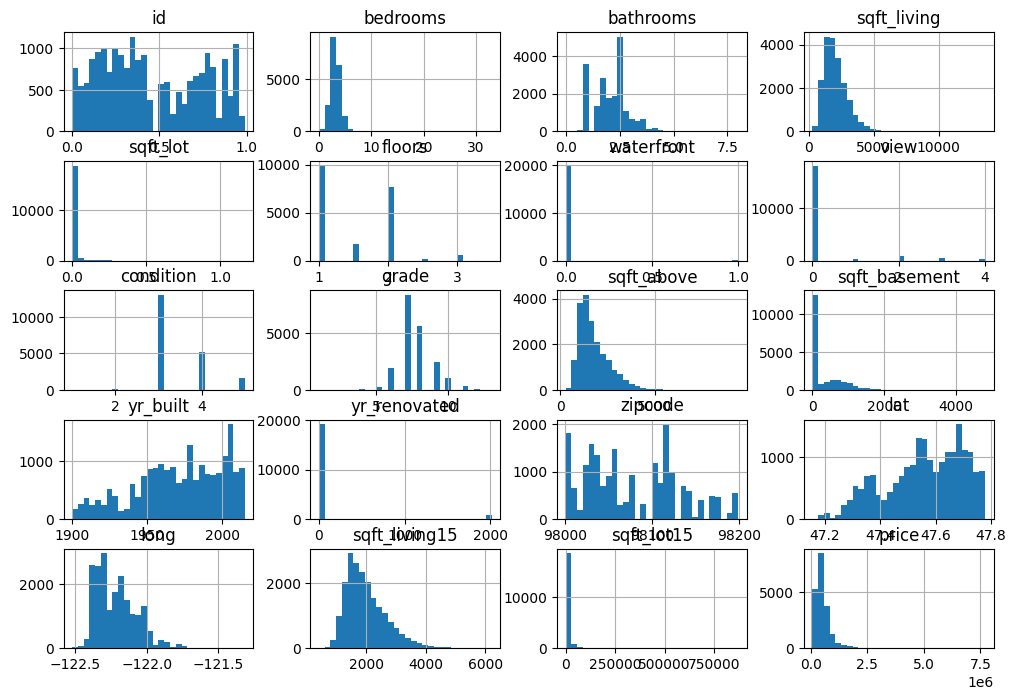

In [6]:
#cheching numerical features


housing.hist(figsize=(12, 8), bins=30)
plt.show()

In [7]:
#categorical features

print(housing['bedrooms'].value_counts())
print(housing['zipcode'].value_counts())


bedrooms
3     9101
4     6354
2     2567
5     1478
6      251
1      179
7       36
8       12
0       11
9        6
10       3
11       1
33       1
Name: count, dtype: int64
zipcode
98103    563
98038    550
98052    536
98115    530
98117    521
        ... 
98109     99
98010     90
98024     78
98148     49
98039     46
Name: count, Length: 70, dtype: int64


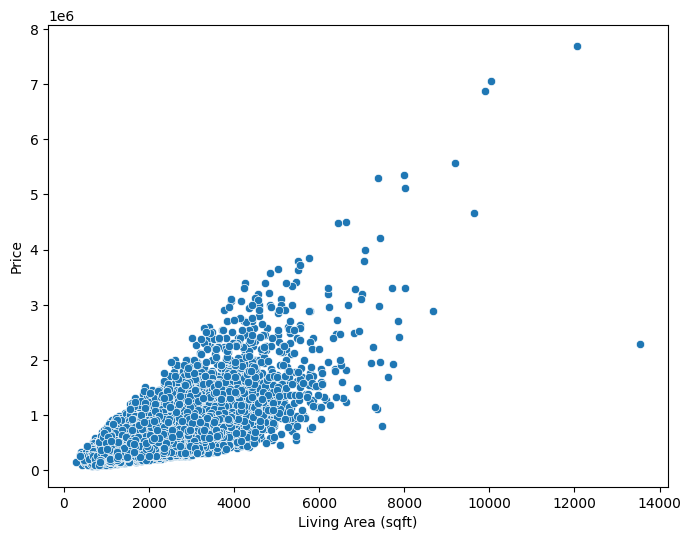

In [8]:
# bivariate analysis for living square area and price

plt.figure(figsize=(8, 6))
sns.scatterplot(x=housing['sqft_living'], y=housing['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

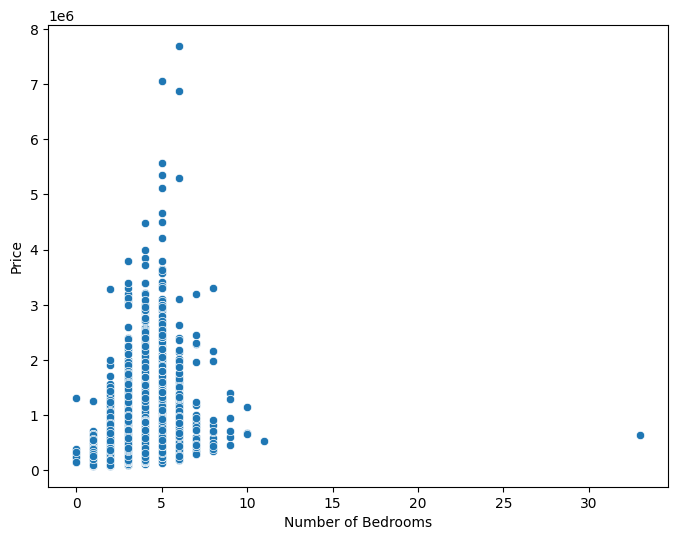

In [19]:
# bivariate analysis for bedroom area and price

plt.figure(figsize=(8, 6))
sns.scatterplot(x=housing['bedrooms'], y=housing['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

we should remove the 30 bedroom because it very far from the previous max bedbroom befere him the prvious max one being 11

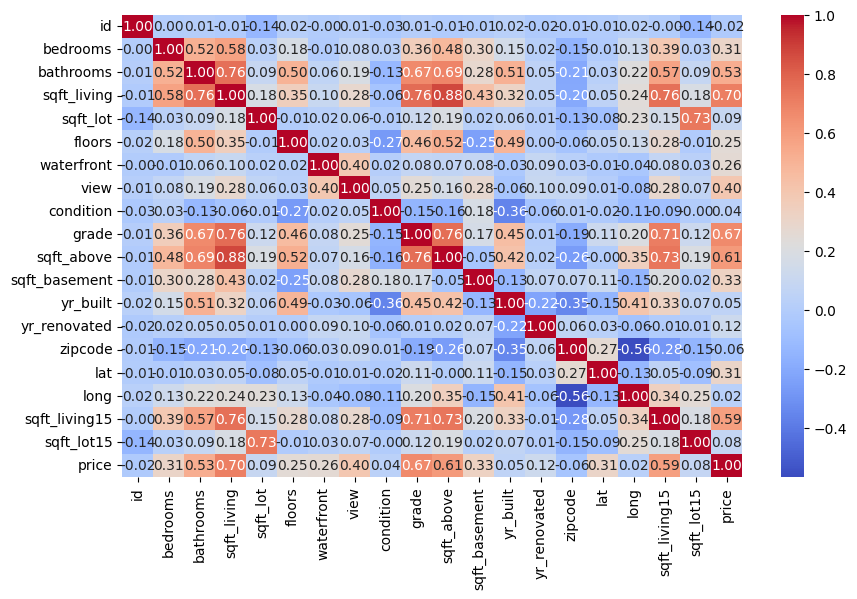

In [16]:
#computing correlation_matrix

numeric_df = housing.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Outliers found: 4321
